<img src = "https://drive.google.com/uc?export=view&id=1A9dhO0gYByNJf9ya0SZmeCzZIeepRhsO" alt = "Encabezado MLDS" width = "100%">  </img>

# **Modelamiento y Validación**
---

Este notebook es una plantilla que le puede servir como guía para el cuarto entregable del proyecto aplicado.

## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. Juan Sebastian Malagón Torres

In [6]:
#Carga de datos
!pip install medmnist
!pip install ydata-profiling

In [7]:
from medmnist import BreastMNIST
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train_set = BreastMNIST(split="train", download=True)
val_set = BreastMNIST(split="val", download=True)
test_set = BreastMNIST(split="test", download=True)

Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Using downloaded and verified file: /root/.medmnist/breastmnist.npz


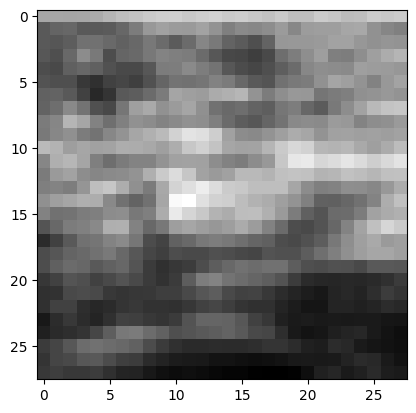

In [9]:
plt.imshow(train_set.imgs[0], cmap = 'gray')

In [5]:
train_imgs = train_set.imgs
train_imgs = train_imgs.reshape(len(train_imgs), 28*28)
train_imgs = pd.DataFrame(train_imgs)
#train_imgs['y'] = train_set.labels

val_imgs = val_set.imgs
val_imgs = val_imgs.reshape(len(val_imgs), 28*28)
val_imgs = pd.DataFrame(val_imgs)
#val_imgs['y'] = val_set.labels

main_train_imgs = pd.concat((train_imgs, val_imgs))
main_train_labels = train_set.labels.flatten().tolist() + val_set.labels.flatten().tolist()
main_train_labels = np.array(main_train_labels)

test_imgs = test_set.imgs
test_imgs = test_imgs.reshape(len(test_imgs), 28*28)
test_imgs = pd.DataFrame(test_imgs)
#test_imgs['y'] = test_set.labels

main_train_imgs

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,139,139,138,139,142,149,156,159,164,167,...,21,23,31,44,48,40,44,51,42,40
1,82,85,83,78,76,76,79,79,76,80,...,25,22,21,24,28,33,27,26,22,19
2,157,155,151,145,149,146,141,134,141,143,...,54,50,50,51,50,59,71,77,79,72
3,167,163,162,151,145,133,139,149,150,149,...,22,25,24,24,23,25,25,26,27,29
4,1,6,41,79,159,180,175,175,175,181,...,73,65,59,60,68,74,69,60,60,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,176,178,179,178,169,169,166,173,169,169,...,33,47,50,49,53,65,79,82,78,76
74,152,146,144,163,158,147,147,156,161,160,...,19,18,19,21,21,22,22,22,24,24
75,147,153,160,163,156,153,140,156,165,150,...,56,49,42,51,60,70,77,76,66,55
76,165,169,167,176,181,174,180,181,178,168,...,15,15,16,17,17,18,20,21,25,27


## **1. Selección y diseño de modelos**
---

Seleccione el/los modelo/s a explorar para aplicar sobre el conjunto de datos. Recuerde que la selección del modelo está influenciada por diferentes factores.

Además, debe definir cuál es su problema:

- **Regresión**: se busca estimar un valor continúo a partir de los datos.
- **Clasificación**: permite estimar un valor categórico a partir de los datos.
- **Agrupamiento**: permite encontrar grupos de datos similares.
- **Otros modelos**: recuerde que dispone de otros tipos de tareas supervisadas y no supervisadas.

Justifique la selección y el diseño de los modelos a explorar.

**Repuesta 1:** La naturaleza del problema exige el uso de modelos de clasificación, pues la variable objetivo es categórica (binaria). Por lo tanto, se explorará el uso de un perceptron multicapa (MLP) junto a una perdida de entropía cruzada, que permita incluir relaciones NO lineales. Adicionalmente, se ajustarán los hiperparámetros correspondientes a su arquitectura (número de neuronas en la capa intermedia), taza de aprendizaje y regularización.

**Repuesta 2:** Dada la falta de una variable objetivo se utilizará un algoritmo de agrupamiento, sien embargo, debido a la alta dimensionalidad de los datos, este será acompañado de un modelo de reducción de dimensionalidad. Por lo tanto, se explorará el uso de un perceptron multicapa (MLP) junto a una perdida de error cuadrático medio para construir un Autocoder que permita obtener una representación reducida de los datos, finalmente sobre dicha representación se aplicara K-means.

Respecto a los hiperparamentros, se tendrá en cuenta la arquitectura (número de neuronas en la capa intermedia), taza de aprendizaje y regularización para el primer modelo. Para el segundo únicamente se identificará el número de clusters.




## **2. Entrenamiento del Modelo y Selección de Hiperparámetros**
---

Entrene el modelo y consiga la combinación eficiente de hiperparámetros para obtener un rendimiento óptimo.

Es importante visualizar los resultados de manera clara y comprensible. Para esto, **se deben utilizar tablas y gráficos** que muestren cómo cambian las métricas de desempeño del proceso de entrenamiento en función de los hiperparámetros probados. Algunas herramientas visuales útiles incluyen las *curvas de aprendizaje* y las *curvas de validación,* que nos permiten comparar el rendimiento del modelo con diferentes ajustes de hiperparámetros.

### Respuesta 1:

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'hidden_layer_sizes':[(64,),(128,),(256,)], 'learning_rate_init':[1e-3, 1e-4], 'alpha':[1e-4,1e-3,1e-2], 'batch_size':[128,256]}
nn = MLPClassifier(random_state=1996, activation='relu', solver='adam', early_stopping=True)
supervised_grid = GridSearchCV(nn, parameters, verbose=3)

supervised_grid.fit(main_train_imgs, main_train_labels)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END alpha=0.0001, batch_size=128, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.712 total time=   0.5s
[CV 2/5] END alpha=0.0001, batch_size=128, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.752 total time=   0.5s
[CV 3/5] END alpha=0.0001, batch_size=128, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.736 total time=   0.6s
[CV 4/5] END alpha=0.0001, batch_size=128, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.728 total time=   0.4s
[CV 5/5] END alpha=0.0001, batch_size=128, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.790 total time=   0.7s
[CV 1/5] END alpha=0.0001, batch_size=128, hidden_layer_sizes=(64,), learning_rate_init=0.0001;, score=0.696 total time=   0.7s
[CV 2/5] END alpha=0.0001, batch_size=128, hidden_layer_sizes=(64,), learning_rate_init=0.0001;, score=0.664 total time=   0.4s
[CV 3/5] END alpha=0.0001, batch_size=128, hidd

GridSearchCV(estimator=MLPClassifier(early_stopping=True, random_state=1996),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'batch_size': [128, 256],
                         'hidden_layer_sizes': [(64,), (128,), (256,)],
                         'learning_rate_init': [0.001, 0.0001]},
             verbose=3)

In [ ]:
best_classification_model = supervised_grid.best_estimator_

cv_results = pd.DataFrame(supervised_grid.cv_results_)
cv_results = cv_results.sort_values(by=['rank_test_score'])
cv_results[['rank_test_score', 'param_hidden_layer_sizes', 'param_learning_rate_init', 'param_alpha', 'param_batch_size', 'mean_test_score']]

,rank_test_score,param_hidden_layer_sizes,param_learning_rate_init,param_alpha,param_batch_size,mean_test_score
26,1,"(128,)",0.0010,0.0100,128,0.766090
4,2,"(256,)",0.0010,0.0001,128,0.761290
20,3,"(128,)",0.0010,0.0010,256,0.759690
24,4,"(64,)",0.0010,0.0100,128,0.759665
14,5,"(128,)",0.0010,0.0010,128,0.759626
8,6,"(128,)",0.0010,0.0001,256,0.758090
16,7,"(256,)",0.0010,0.0010,128,0.756503
28,8,"(256,)",0.0010,0.0100,128,0.756477
32,9,"(128,)",0.0010,0.0100,256,0.751665
12,10,"(64,)",0.0010,0.0010,128,0.748465


### Respuesta 2:

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'hidden_layer_sizes':[(64,),(128,)], 'learning_rate_init':[1e-3, 1e-4], 'alpha':[1e-3,1e-2]}
nn = MLPRegressor(random_state=1996, activation='relu', solver='adam', early_stopping=True, batch_size = 128, max_iter=500)
non_supervised_grid = GridSearchCV(nn, parameters, cv=3, verbose=3)

non_supervised_grid.fit(main_train_imgs, main_train_imgs)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.814 total time=  18.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.823 total time=  24.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.816 total time=  18.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.0001;, score=0.684 total time=  15.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.0001;, score=0.701 total time=  16.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.0001;, score=0.710 total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.001;, score=0.870 total time=  28.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.001;, score=0.865 total time=  26.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.001;, score=0.870 total time=  26.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.0001;, score=0.742 total time=  25.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.0001;, score=0.740 total time=  28.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.0001;, score=0.760 total time=  24.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.816 total time=  16.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.822 total time=  16.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.816 total time=  17.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.0001;, score=0.681 total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.0001;, score=0.697 total time=  15.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.0001;, score=0.715 total time=  16.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=(128,), learning_rate_init=0.001;, score=0.872 total time=  26.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=(128,), learning_rate_init=0.001;, score=0.866 total time=  25.5s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=(128,), learning_rate_init=0.001;, score=0.867 total time=  25.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=(128,), learning_rate_init=0.0001;, score=0.742 total time=  26.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=(128,), learning_rate_init=0.0001;, score=0.740 total time=  23.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=(128,), learning_rate_init=0.0001;, score=0.750 total time=  26.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=MLPRegressor(batch_size=128, early_stopping=True,
                                    max_iter=500, random_state=1996),
             param_grid={'alpha': [0.001, 0.01],
                         'hidden_layer_sizes': [(64,), (128,)],
                         'learning_rate_init': [0.001, 0.0001]},
             verbose=3)

In [ ]:
best_autoencoder = non_supervised_grid.best_estimator_

cv_results = pd.DataFrame(non_supervised_grid.cv_results_)
cv_results = cv_results.sort_values(by=['rank_test_score'])
cv_results[['rank_test_score', 'param_hidden_layer_sizes', 'param_learning_rate_init', 'param_alpha', 'mean_test_score']]

,rank_test_score,param_hidden_layer_sizes,param_learning_rate_init,param_alpha,mean_test_score
6,1,"(128,)",0.0010,0.010,0.868227
2,2,"(128,)",0.0010,0.001,0.868114
4,3,"(64,)",0.0010,0.010,0.818237
0,4,"(64,)",0.0010,0.001,0.817396
3,5,"(128,)",0.0001,0.001,0.747580
7,6,"(128,)",0.0001,0.010,0.743973
1,7,"(64,)",0.0001,0.001,0.698001
5,8,"(64,)",0.0001,0.010,0.697536


In [ ]:
interpects = best_autoencoder.intercepts_[0]
coefs = best_autoencoder.coefs_[0]
activation = lambda x: np.clip(x, a_min=0, a_max=None)

representation = activation((main_train_imgs.values@coefs) + interpects)


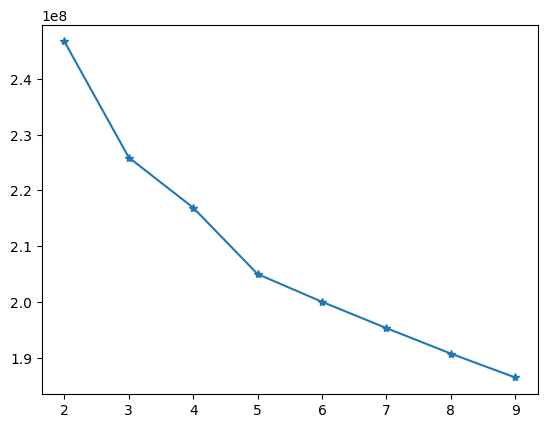

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for i in range (2,10):
  model_clustering = KMeans(n_clusters=i, random_state=1996, n_init="auto").fit(representation)
  inertia.append(model_clustering.inertia_)

plt.plot(list(range (2,10)), inertia, '*-')
plt.show()

best_clustering = KMeans(n_clusters=3, random_state=1996, n_init="auto").fit(representation)

## **3. Evaluación del modelo**
---

En esta sección debe reportar el desempeño del modelo sobre la partición de datos de pruebas (test). Considere que dispone de las siguientes métricas:

- **Clasificación**: accuracy, precision, recall, f1-score, AUC, matriz de confusión, etc.
- **Regresión**: $r^2$, error cuadrático medio, error absoluto medio, etc.
- **Agrupamiento**: coeficiente de silueta, índice de Davies-Bouldin, etc.

Los resultados se deben presentar usando tablas y figuras además del análisis detallado respectivo.

### Respuesta 1:

In [ ]:
from sklearn.metrics import classification_report

y_ = best_classification_model.predict(test_imgs)
y_test = test_set.labels.flatten()

print(classification_report(y_test, y_))

              precision    recall  f1-score   support

           0       0.78      0.33      0.47        42
           1       0.80      0.96      0.87       114

    accuracy                           0.79       156
   macro avg       0.79      0.65      0.67       156
weighted avg       0.79      0.79      0.76       156



### Respuesta 2:

In [ ]:
representation_test = activation((test_imgs.values@coefs) + interpects)
groups = best_clustering.predict(representation_test)

pd.crosstab(y_test, groups)

col_0,0,1,2
row_0,,,
0,14,8,20
1,34,44,36


Adicionalmente, si utilizó un modelo pre-entrenado, debe generar predicciones y mostrar el resultado final de la aplicación del modelo sobre sus datos:

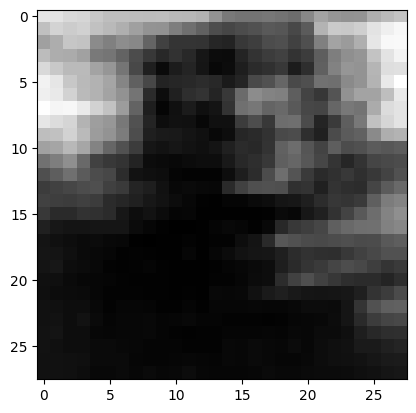

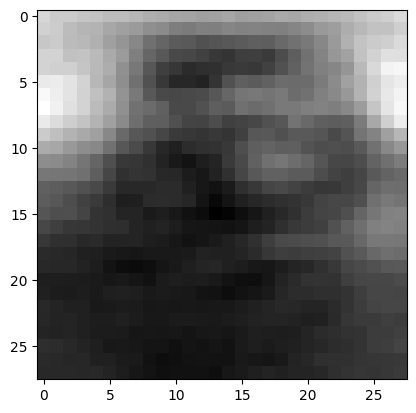

In [ ]:
test_imgs_ = best_autoencoder.predict(test_imgs)
i=0

plt.imshow(test_imgs.iloc[i].values.reshape([28,28]), cmap='gray')
plt.show()
plt.imshow(test_imgs_[i].reshape([28,28]), cmap='gray')
plt.show()

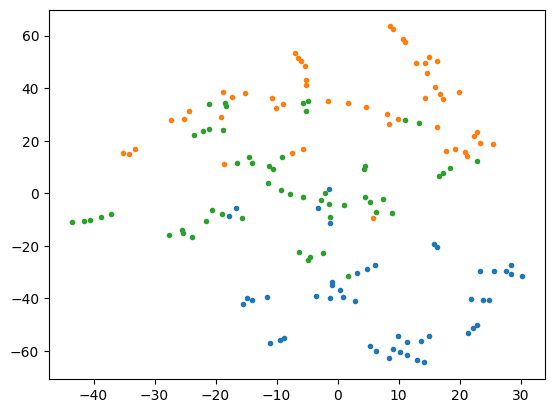

In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(representation_test)

for i in range (max(groups)+1):
  plt.plot(X_embedded[groups == i,0], X_embedded[groups == i,1], '.')

## **4. Aplicación del modelo**
---

Una vez que haya entrenado y evaluado su modelo, es importante considerar cómo puede ser utilizado en un entorno práctico.

Intente analizar la capacidad del modelo para generalizar nuevos datos que no formaron parte del conjunto de entrenamiento o evaluación.

### Respuesta 1:

predicted: 1.0, 0


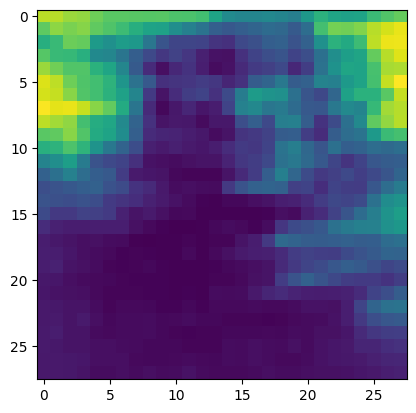

predicted: 0.0, 1


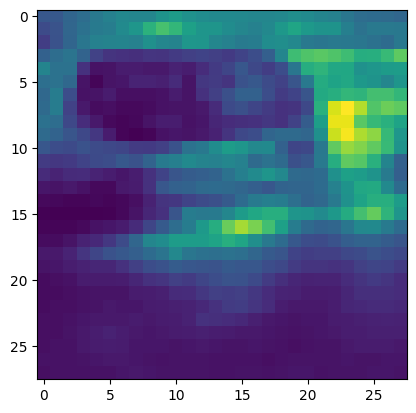

predicted: 0.0, 1


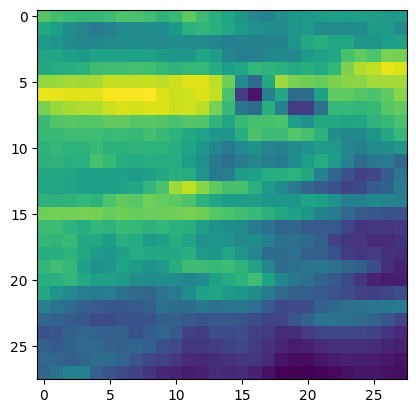

In [ ]:
n=3
test_predict = best_classification_model.predict_proba(test_imgs.iloc[:n])
y_test_reduced = test_set.labels.flatten()[:n]

for j in range (n):
  print(f'predicted: {round(test_predict[j,0],2)}, {y_test_reduced[j]}')
  plt.imshow(test_imgs.iloc[j].values.reshape([28,28]))
  plt.show()

### Respuesta 2:

predicted: 0


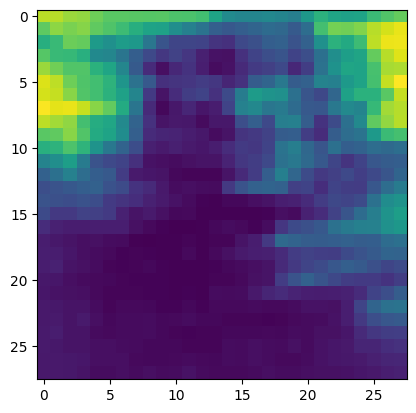

predicted: 0


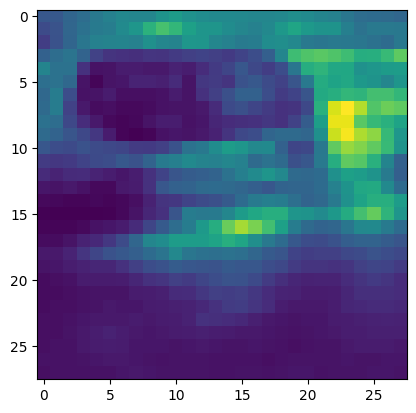

predicted: 1


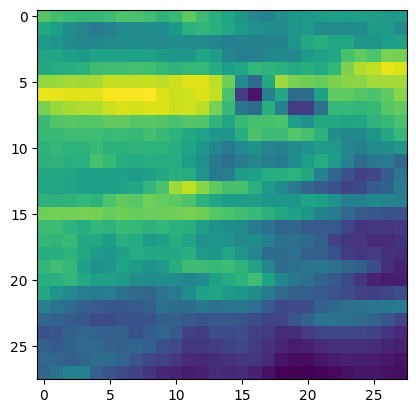

In [ ]:
n=3
rp = activation((test_imgs.values@coefs) + interpects)
pred_cluster = best_clustering.predict(rp[:n])

for j in range (n):
  print(f'predicted: {pred_cluster[j]}')
  plt.imshow(test_imgs.iloc[j].values.reshape([28,28]))
  plt.show()

## **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistente docente :**
  * [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*